In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import random

In [5]:
from experiments.synthetic.data import generate_triangle_dataset

In [6]:
np.random.seed(0)
random.seed(0)
max_r = 10.0
dataset = generate_triangle_dataset(num_samples=10, min_dist=2.0, max_r=max_r, num_points=100)

100%|██████████| 10/10 [00:00<00:00, 81.74it/s]


In [7]:
data = dataset[0]

In [8]:
data

{'x': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 'mask': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [9]:
pos = data.get('pos')
triangle_points = data.get('mask')

Distance COM-Pointcloud to COM-Triangle: 1.7040
Surface Area Triangle: 39.7414
Perimeter Triangle: 33.1909



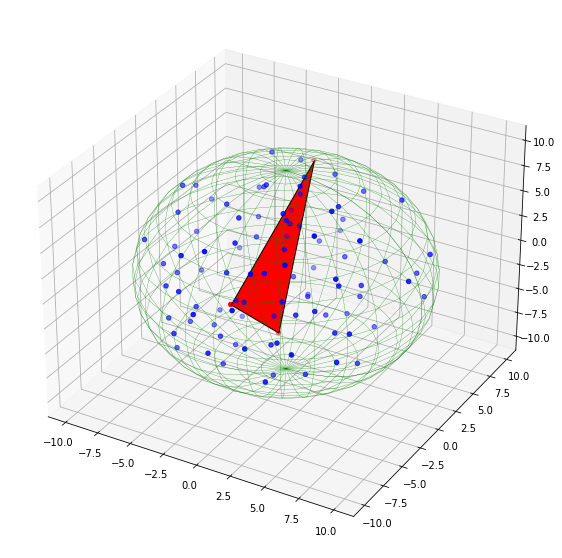

In [11]:
pos_triangles = pos[triangle_points]
pos_rest = pos[~triangle_points]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
xx = max_r * np.cos(u) * np.sin(v)
yy = max_r * np.sin(u) * np.sin(v)
zz = max_r * np.cos(v)
ax.plot_wireframe(xx, yy, zz, color="green", linewidths=0.25)

x, y, z = pos_rest[:, 0], pos_rest[:, 1], pos_rest[:, 2]
ax.scatter(x, y, z, color="blue")

x, y, z = pos_triangles[:, 0], pos_triangles[:, 1], pos_triangles[:, 2]
ax.scatter(x, y, z, color="red")

zero = np.zeros((1,1))
ax.scatter(zero, zero, zero, color='black', marker="^", s=40)

tri = a3.art3d.Poly3DCollection([pos_triangles])
tri.set_color('red')
tri.set_edgecolor('k')
ax.add_collection3d(tri)
com_pointcloud = pos.mean(0)
com_triangle = pos_triangles.mean(0)
distance = np.sqrt(np.power(com_pointcloud - com_triangle, 2).sum())
A, B, C = np.split(pos_triangles, 3, axis=0)
AB = B - A
AC = C - A
BC = C - B
area = 0.5 * np.sqrt(np.power(np.cross(AB, AC), 2).sum())
perimeter = np.sqrt(np.power(AB, 2).sum()) + np.sqrt(np.power(AC, 2).sum()) + np.sqrt(np.power(BC, 2).sum())

print(f"Distance COM-Pointcloud to COM-Triangle: {distance:.4f}")
print(f"Surface Area Triangle: {area:.4f}")
print(f"Perimeter Triangle: {perimeter:.4f}")

print()
plt.savefig('data/example_structure.png')
plt.show()